In [ ]:
# parkinsons' data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import pickle   # NEW
from pathlib import Path  # NEW

from copy import deepcopy

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/parkinsons - parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Dataset description
Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of the ratio of noise to tonal components in the voice

status - The health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
# we dont have any null values
df.isna().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


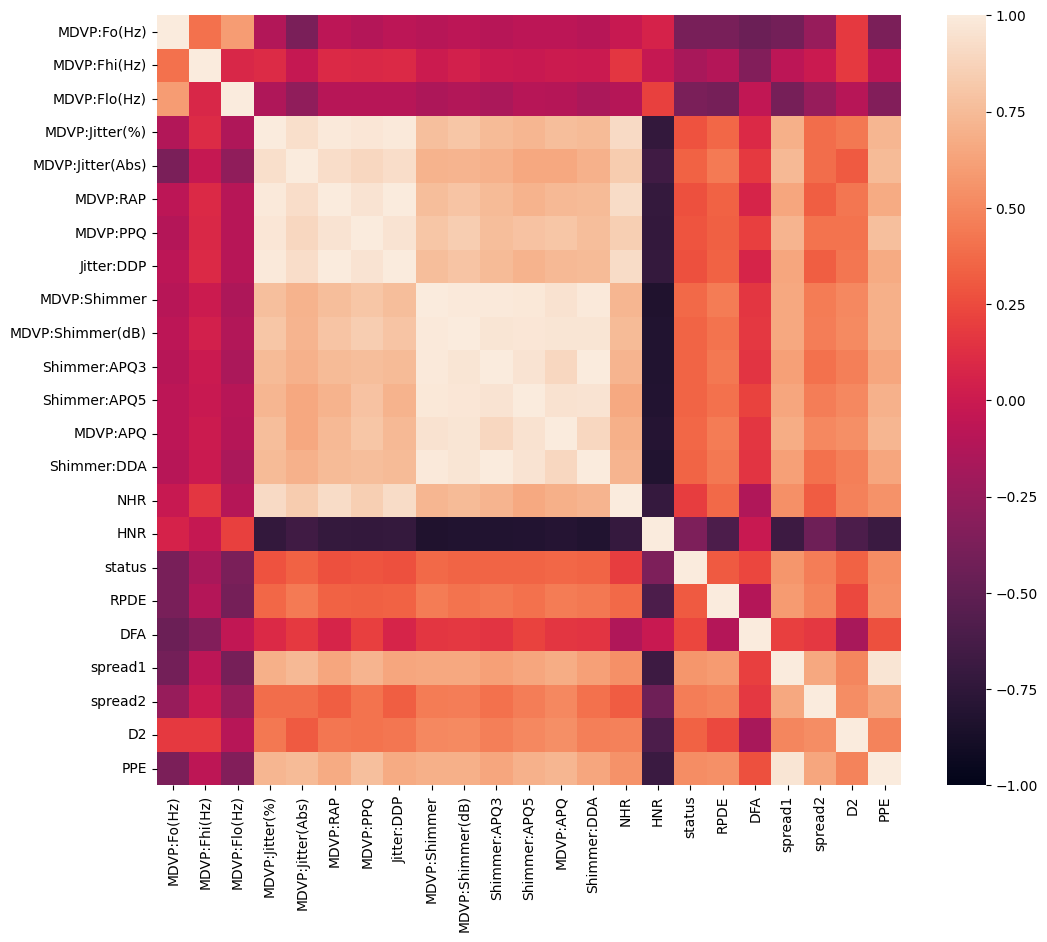

In [ ]:
# Convert columns with object type to numerical type before calculating correlation.
# Assuming 'status' is the target variable and the rest are features.
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation on the numerical data
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1)
plt.show()

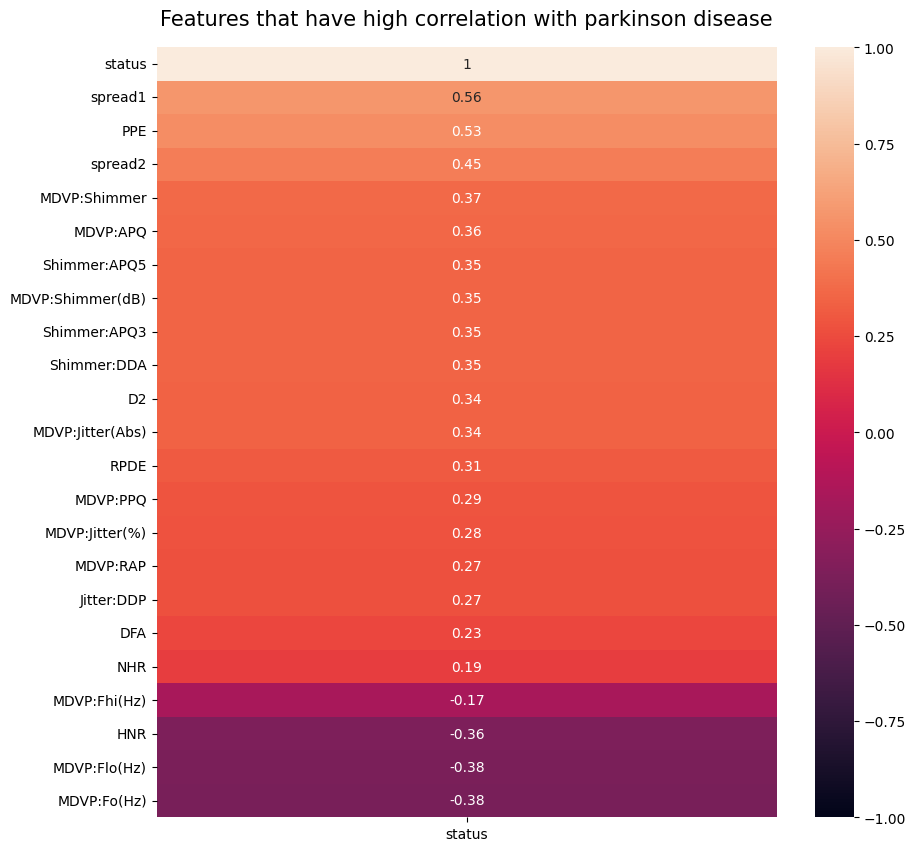

In [ ]:
# modify the headmap plot to show correlation variables to the status
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(numerical_df.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features that have high correlation with parkinson disease', fontdict={'fontsize':15}, pad=16);

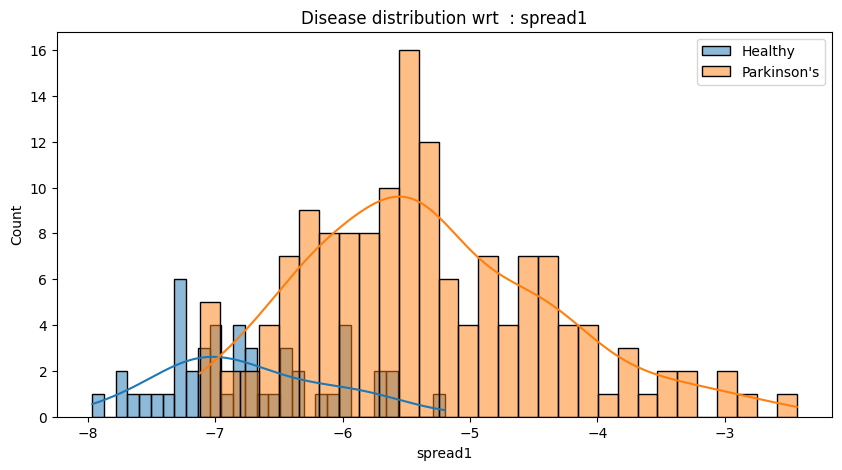

In [ ]:
feature = 'spread1'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

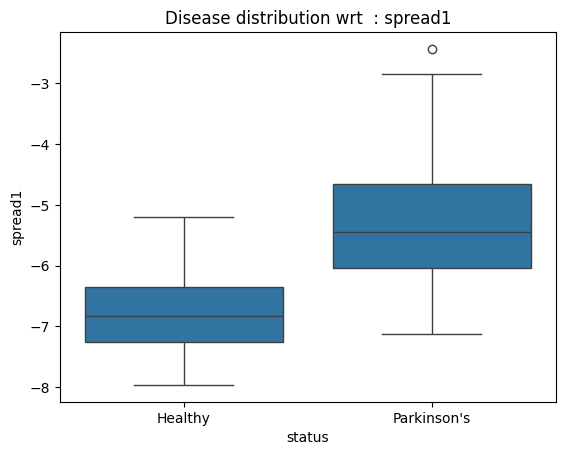

In [ ]:
sns.boxplot(x='status', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.show()

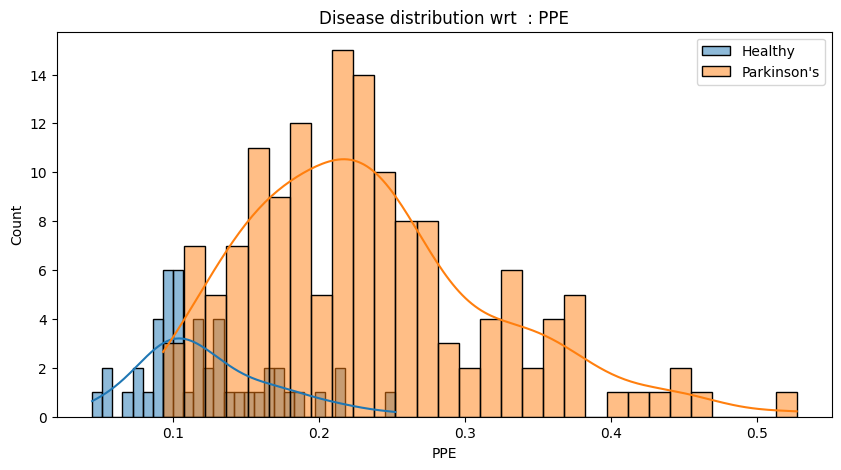

In [ ]:
feature = 'PPE'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

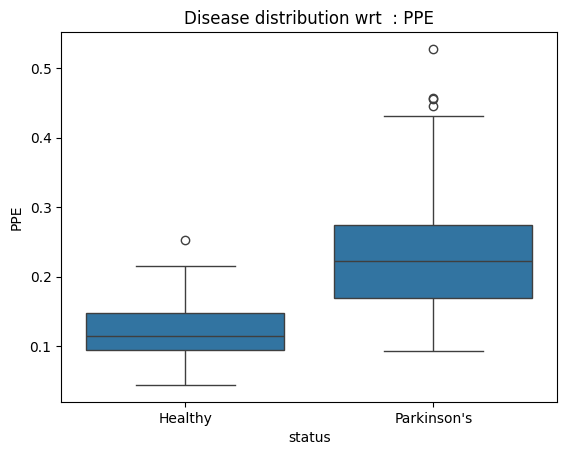

In [ ]:
sns.boxplot(x='status', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.show()

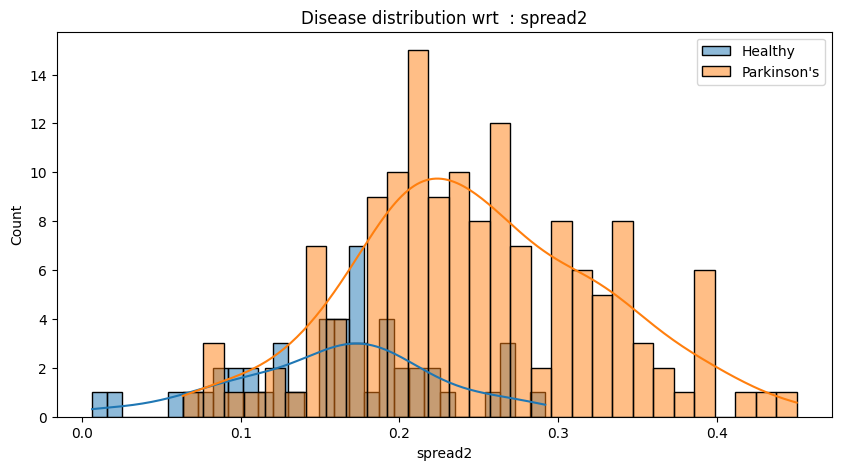

In [ ]:
feature = 'spread2'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

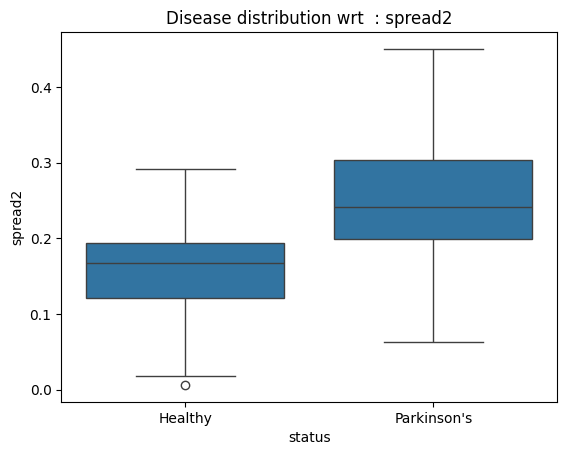

In [ ]:
sns.boxplot(x='status', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.show()

In [ ]:
df["status"].value_counts()

,count
status,
1,147
0,48


In [ ]:
X = df.drop(['status', 'name'], axis=1) # Drop the 'status' and 'name' columns
y = df['status']

# print df 1 row with column names tranposed
print(X.head().transpose())
print(y.head())

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

parkinson_scalar = deepcopy(scaler)
parkinson_feature_names = X_train.columns

print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

                           0           1           2           3           4
MDVP:Fo(Hz)       119.992000  122.400000  116.682000  116.676000  116.014000
MDVP:Fhi(Hz)      157.302000  148.650000  131.111000  137.871000  141.781000
MDVP:Flo(Hz)       74.997000  113.819000  111.555000  111.366000  110.655000
MDVP:Jitter(%)      0.007840    0.009680    0.010500    0.009970    0.012840
MDVP:Jitter(Abs)    0.000070    0.000080    0.000090    0.000090    0.000110
MDVP:RAP            0.003700    0.004650    0.005440    0.005020    0.006550
MDVP:PPQ            0.005540    0.006960    0.007810    0.006980    0.009080
Jitter:DDP          0.011090    0.013940    0.016330    0.015050    0.019660
MDVP:Shimmer        0.043740    0.061340    0.052330    0.054920    0.064250
MDVP:Shimmer(dB)    0.426000    0.626000    0.482000    0.517000    0.584000
Shimmer:APQ3        0.021820    0.031340    0.027570    0.029240    0.034900
Shimmer:APQ5        0.031300    0.045180    0.038580    0.040050    0.048250

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained model using various metrics.

    Args:
        model: The trained machine learning model.
        X_test: The test features.
        y_test: The true labels for the test set.

    Returns:
        A dictionary containing the computed metrics.
    """

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    _confusion_matrix = confusion_matrix(y_test, y_pred)
    _classification_report = classification_report(y_test, y_pred)

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": _confusion_matrix,
        "Classification Report": _classification_report
    }

    return metrics




###############################################################################
# 1) Search spaces
###############################################################################
param_grids = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1, 10],
        "solver": ["saga"],              # supports all penalties + probas
        "l1_ratio": [0, 0.5, 1]          # used only when penalty="elasticnet"
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 11, 15],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Random Forest": {
        "n_estimators": [200, 400, 800],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "bootstrap": [True, False]
    },
    "XGBoost": {
        "n_estimators":  np.arange(300, 801, 100),
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth":     [3, 5, 7],
        "subsample":     [0.8, 1],
        "colsample_bytree": [0.8, 1],
        "gamma":         [0, 0.5, 1]
    }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric="logloss",
        random_state=42, n_jobs=-1, scale_pos_weight=1  # tweak if data is imbalanced
    ),
}

###############################################################################
# 2) Helper – choose GridSearch vs RandomizedSearch
###############################################################################
def tuned_estimator(name, base_model, X, y, cv=5):
    scorer = make_scorer(roc_auc_score, needs_proba=True)
    if name == "XGBoost":  # large search space → RandomizedSearch
        search = RandomizedSearchCV(
            base_model,
            param_distributions=param_grids[name],
            n_iter=40,
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            random_state=42,
            verbose=0,
        )
    else:                  # modest spaces → full GridSearch
        search = GridSearchCV(
            base_model,
            param_grid=param_grids[name],
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            verbose=0,
        )
    search.fit(X, y)
    print(f"{name}: best CV ROC‑AUC = {search.best_score_:.4f}")
    print(f"   best params   = {search.best_params_}\n")
    return search.best_estimator_



# ---------------------------------------------------------------------------
# 3) Tune, train on full train set, evaluate on hold‑out test set, and save
# ---------------------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_auc = -np.inf          # NEW
best_model = None           # NEW
best_name  = ""             # NEW
all_results = []            # save every model's metrics if you wish

for name, base_model in models.items():
    print(f"⏳  Tuning {name} …")
    tuned_model = tuned_estimator(name, base_model, X_train_scaled, y_train, cv=cv)

    metrics = evaluate_model(tuned_model, X_test_scaled, y_test)
    all_results.append((name, metrics, tuned_model))          # NEW

    test_auc = metrics["ROC-AUC"]
    print(f"▶️  Test‑set performance for {name} (ROC‑AUC = {test_auc:.4f})")
    for m, v in metrics.items():
        if m in ["Confusion Matrix", "Classification Report"]:
            print(f"{m}:\n{v}")
        else:
            print(f"{m}: {v:.4f}")
    print("-" * 60)

    # --- keep track of the best model -------------------------------------- #
    if test_auc > best_auc:
        best_auc   = test_auc
        best_model = tuned_model
        best_name  = name

# ---------------------------------------------------------------------------
# 4) Persist the best model to disk (pickle)
# ---------------------------------------------------------------------------
out_path = Path("best_model_parkinsons.pkl")
with out_path.open("wb") as f:
    pickle.dump(best_model, f)

print(f"✅  Saved best model ({best_name}, ROC‑AUC = {best_auc:.4f}) ➜ {out_path.resolve()}")


⏳  Tuning Logistic Regression …
Logistic Regression: best CV ROC‑AUC = nan
   best params   = {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}

▶️  Test‑set performance for Logistic Regression (ROC‑AUC = 0.5000)
Accuracy: 0.7436
Precision: 0.7436
Recall: 1.0000
F1-score: 0.8529
ROC-AUC: 0.5000
Confusion Matrix:
[[ 0 10]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39

------------------------------------------------------------
⏳  Tuning K-Nearest Neighbors …
K-Nearest Neighbors: best CV ROC‑AUC = nan
   best params   = {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

▶️  Test‑set performance for K-Nearest Neighbors (ROC‑AUC = 0.9759)
Accuracy: 0.9231


In [ ]:
df = pd.read_csv('/content/indian_liver_patient - indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


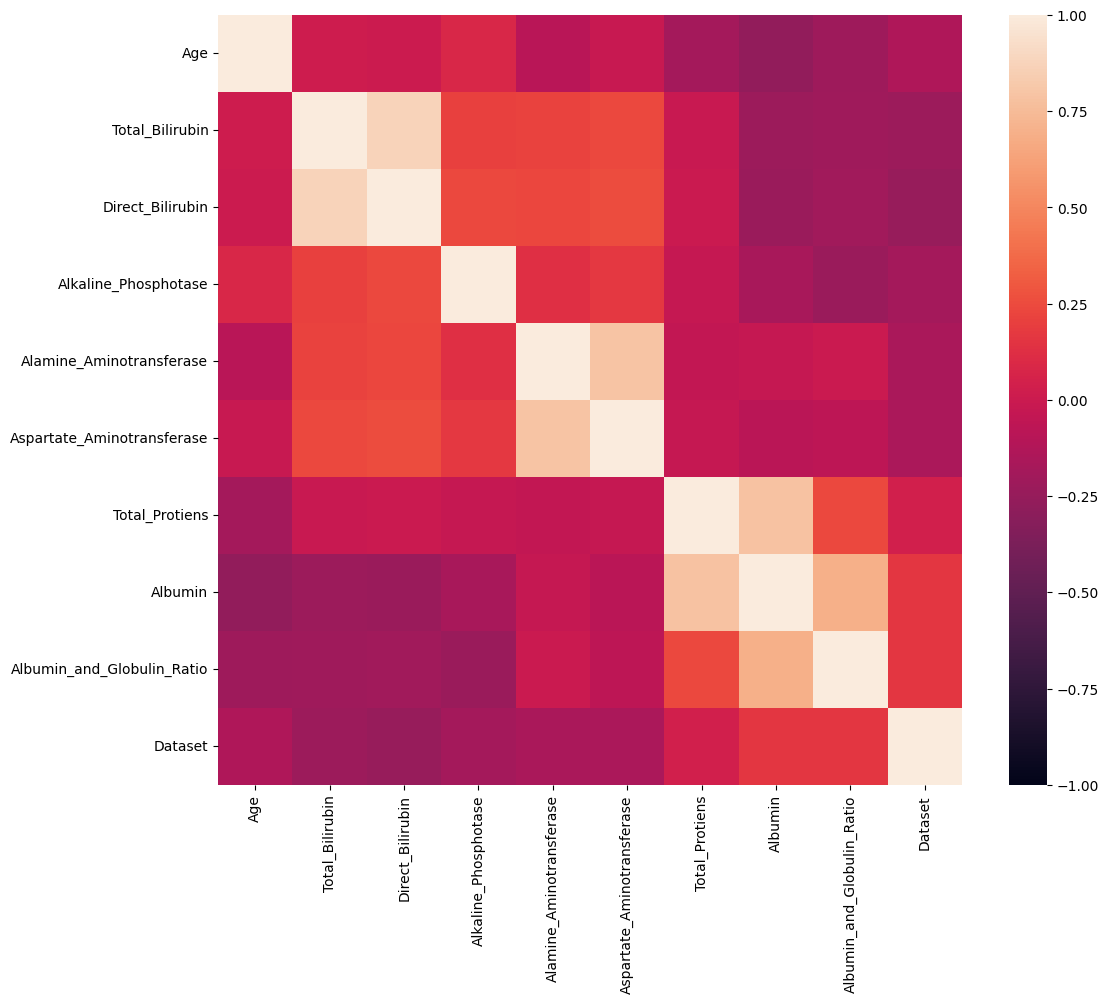

In [ ]:

numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation on the numerical data
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1)
plt.show()

# From the above plot,  we can see high correlation between the following features:
- Direct_Bilirubin and Total_Bilirubin
- Aspartate_Aminotransferase and Alamine_Aminotransferase
- Total_Protiens, Albumin_and_Globulin_Ratio and Albumin

So we remove redudant features and only keep the following:

- Total_Bilirubin
- Alamine_Aminotransferase
- Total_Protiens
- Albumin_and_Globulin_Ratio


In [ ]:
df = df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Albumin'], axis=1)

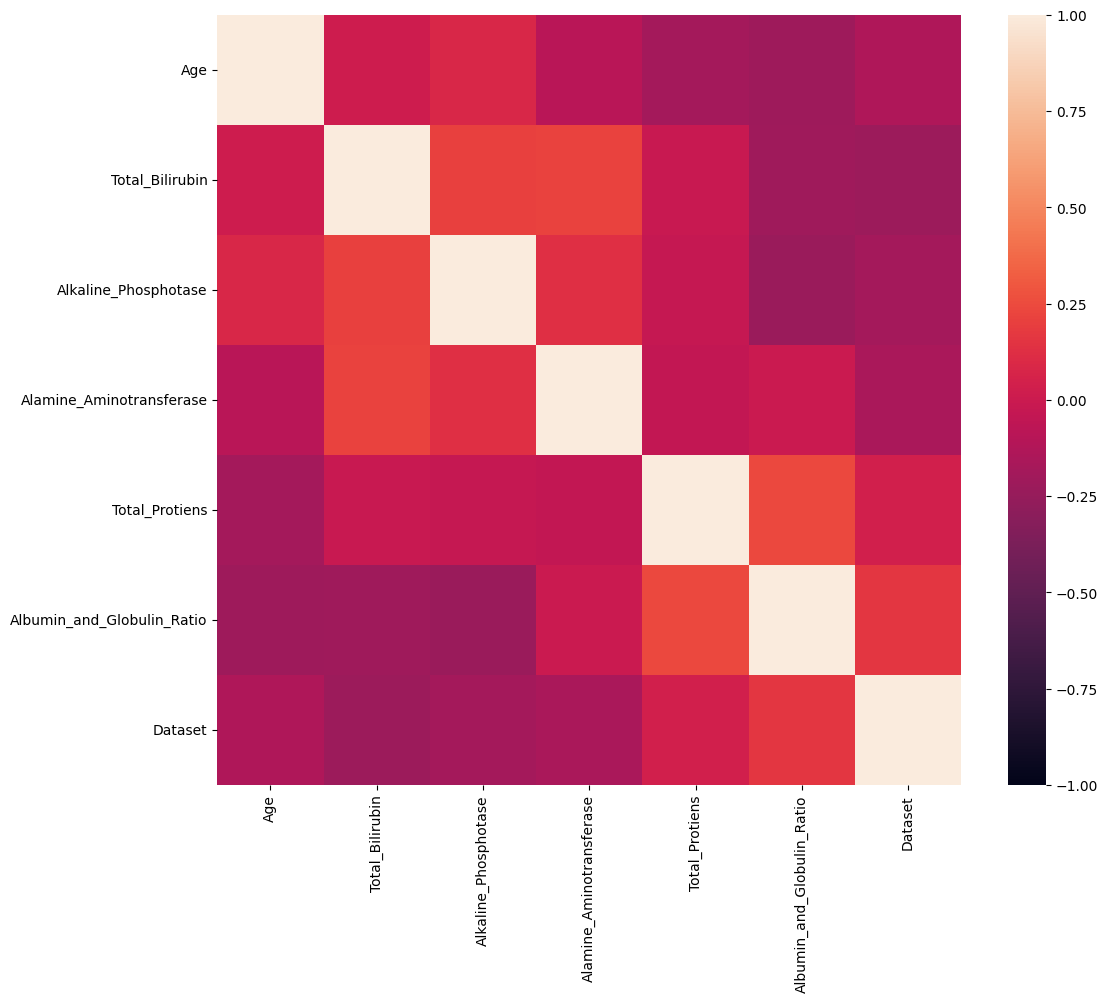

In [ ]:

numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation on the numerical data
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1)
plt.show()

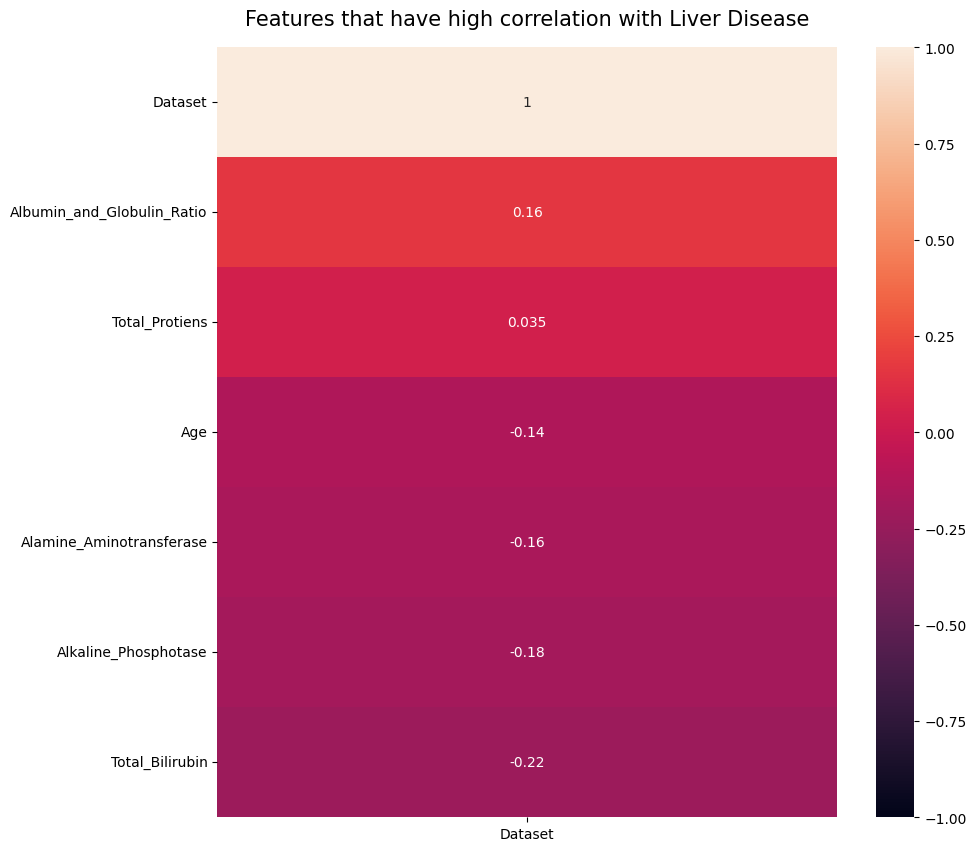

In [ ]:

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(numerical_df.corr()[['Dataset']].sort_values(by='Dataset', ascending=False), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Features that have high correlation with Liver Disease', fontdict={'fontsize':15}, pad=16);

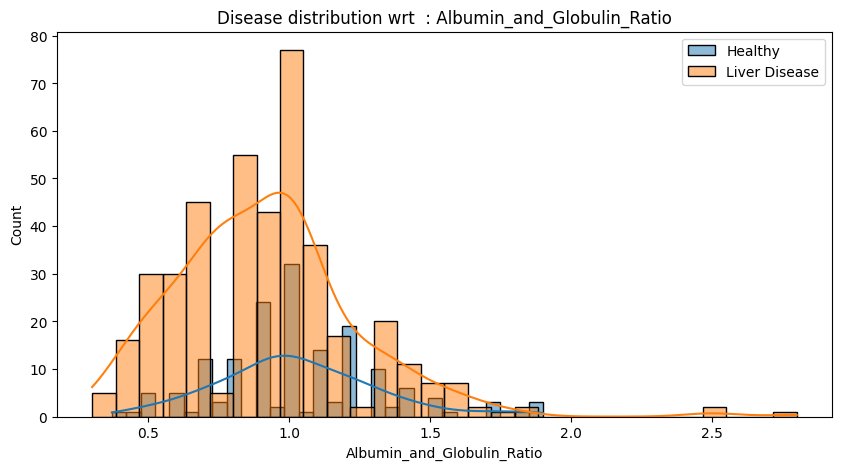

In [ ]:
feature = 'Albumin_and_Globulin_Ratio'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['Dataset'] == 2][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['Dataset'] == 1][feature], bins=30, kde=True, label='Liver Disease')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

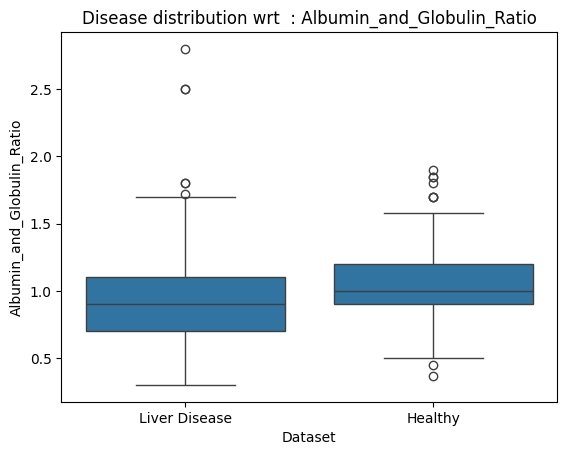

In [ ]:
sns.boxplot(x='Dataset', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Liver Disease', 'Healthy'])
plt.show()

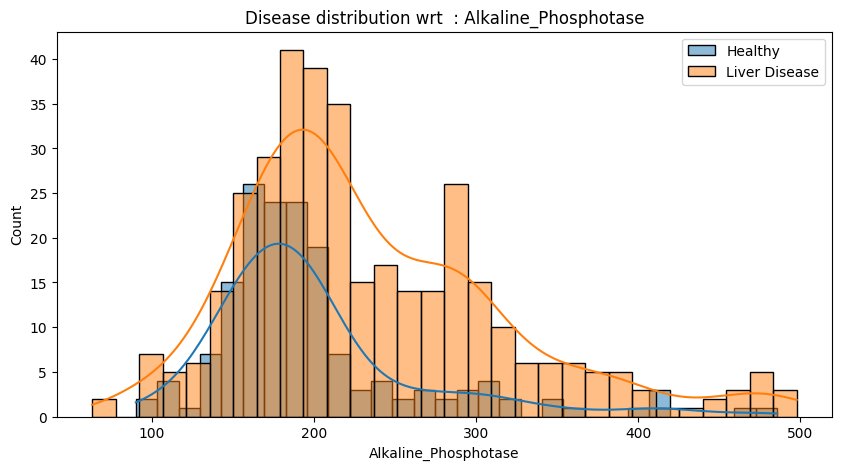

In [ ]:
feature = 'Alkaline_Phosphotase'
plt.figure(figsize=(10,5))

min_df = df[df[feature] < 500]

fig = sns.histplot(min_df[min_df['Dataset'] == 2][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(min_df[min_df['Dataset'] == 1][feature], bins=30, kde=True, label='Liver Disease')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

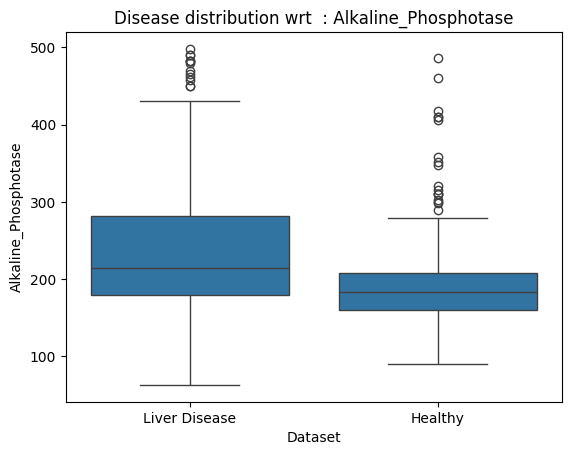

In [ ]:
sns.boxplot(x='Dataset', y=feature, data=min_df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Liver Disease', 'Healthy'])
plt.show()

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


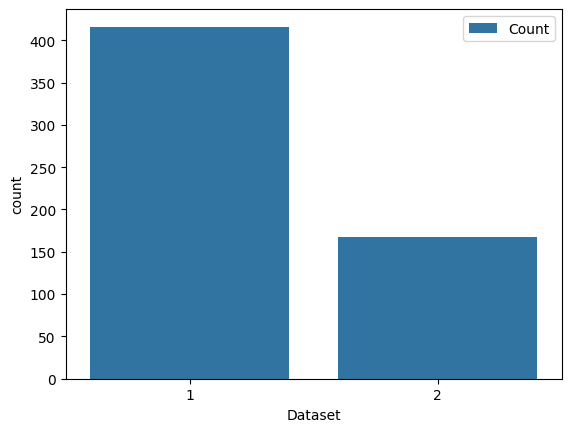

In [ ]:
sns.countplot(data=df, x = 'Dataset', label='Count')

Diseased, healthy = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ', Diseased)
print('Number of patients not diagnosed with liver disease: ', healthy)

Number of patients that are male:  441
Number of patients that are female:  142


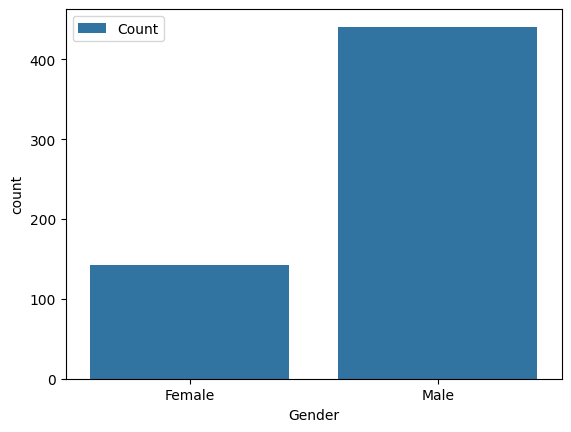

In [ ]:
sns.countplot(data=df, x = 'Gender', label='Count')

Male, Female = df['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

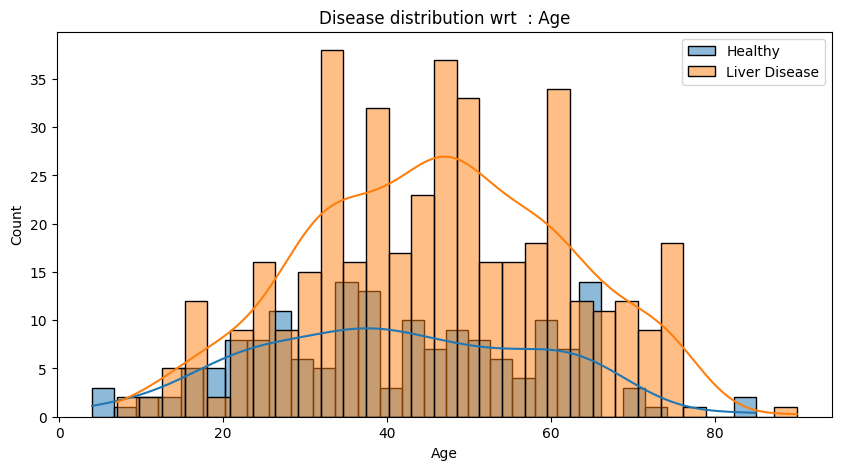

In [ ]:
feature = 'Age'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['Dataset'] == 2][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['Dataset'] == 1][feature], bins=30, kde=True, label='Liver Disease')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

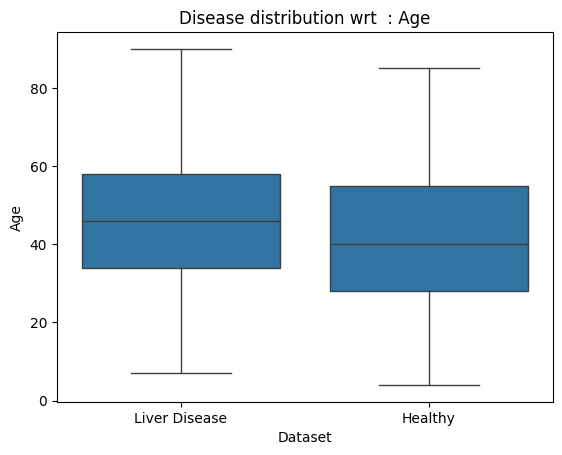

In [ ]:
sns.boxplot(x='Dataset', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Liver Disease', 'Healthy'])
plt.show()

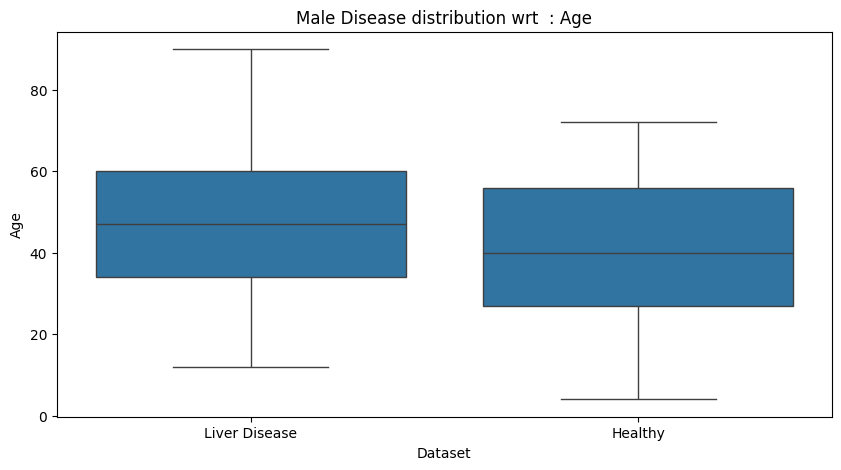

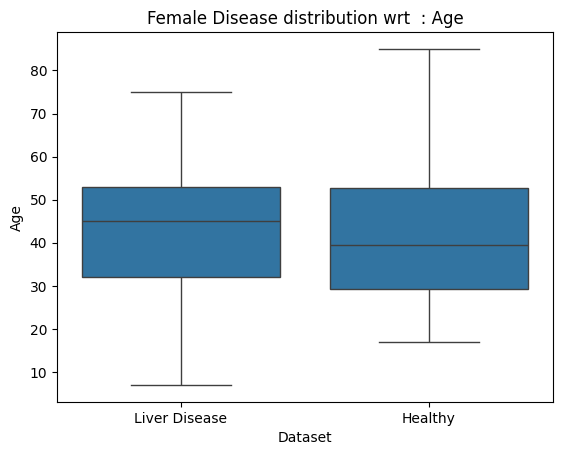

In [ ]:
feature = 'Age'
plt.figure(figsize=(10,5))
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

sns.boxplot(x='Dataset', y=feature, data=male_df)
plt.title("Male Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Liver Disease', 'Healthy'])
plt.show()


sns.boxplot(x='Dataset', y=feature, data=female_df)
plt.title("Female Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Liver Disease', 'Healthy'])
plt.show()

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.drop('Gender', axis=1, inplace=True)

In [ ]:
X = df.drop(['Dataset'], axis=1) # Drop the 'status' and 'name' columns
y = df['Dataset']

# print df 1 row with column names tranposed
print(X.head().transpose())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

liver_scalar = deepcopy(scaler)
liver_feature_names = X_train.columns

# change y labels from 1,2 to 0,1
y_train = y_train - 1
y_test = y_test - 1


                                0      1      2      3      4
Age                            65     62     62     58     72
Total_Bilirubin               0.7   10.9    7.3    1.0    3.9
Alkaline_Phosphotase          187    699    490    182    195
Alamine_Aminotransferase       16     64     60     14     27
Total_Protiens                6.8    7.5    7.0    6.8    7.3
Albumin_and_Globulin_Ratio    0.9   0.74   0.89    1.0    0.4
Gender_Female                True  False  False  False  False
Gender_Male                 False   True   True   True   True
0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64


In [ ]:
# print stats of the dataset
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(466, 8)
(466,)
(117, 8)
(117,)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained model using various metrics.

    Args:
        model: The trained machine learning model.
        X_test: The test features.
        y_test: The true labels for the test set.

    Returns:
        A dictionary containing the computed metrics.
    """

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    _confusion_matrix = confusion_matrix(y_test, y_pred)
    _classification_report = classification_report(y_test, y_pred)

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": _confusion_matrix,
        "Classification Report": _classification_report
    }

    return metrics




###############################################################################
# 1) Search spaces
###############################################################################
param_grids = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1, 10],
        "solver": ["saga"],              # supports all penalties + probas
        "l1_ratio": [0, 0.5, 1]          # used only when penalty="elasticnet"
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 11, 15],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Random Forest": {
        "n_estimators": [200, 400, 800],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "bootstrap": [True, False]
    },
    "XGBoost": {
        "n_estimators":  np.arange(300, 801, 100),
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth":     [3, 5, 7],
        "subsample":     [0.8, 1],
        "colsample_bytree": [0.8, 1],
        "gamma":         [0, 0.5, 1]
    }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric="logloss",
        random_state=42, n_jobs=-1, scale_pos_weight=1  # tweak if data is imbalanced
    ),
}

###############################################################################
# 2) Helper – choose GridSearch vs RandomizedSearch
###############################################################################
def tuned_estimator(name, base_model, X, y, cv=5):
    scorer = make_scorer(roc_auc_score, needs_proba=True)
    if name == "XGBoost":  # large search space → RandomizedSearch
        search = RandomizedSearchCV(
            base_model,
            param_distributions=param_grids[name],
            n_iter=40,
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            random_state=42,
            verbose=0,
        )
    else:                  # modest spaces → full GridSearch
        search = GridSearchCV(
            base_model,
            param_grid=param_grids[name],
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            verbose=0,
        )
    search.fit(X, y)
    print(f"{name}: best CV ROC‑AUC = {search.best_score_:.4f}")
    print(f"   best params   = {search.best_params_}\n")
    return search.best_estimator_



# ---------------------------------------------------------------------------
# 3) Tune, train on full train set, evaluate on hold‑out test set, and save
# ---------------------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_auc = -np.inf          # NEW
best_model = None           # NEW
best_name  = ""             # NEW
all_results = []            # save every model's metrics if you wish

for name, base_model in models.items():
    print(f"⏳  Tuning {name} …")
    tuned_model = tuned_estimator(name, base_model, X_train_scaled, y_train, cv=cv)

    metrics = evaluate_model(tuned_model, X_test_scaled, y_test)
    all_results.append((name, metrics, tuned_model))          # NEW

    test_auc = metrics["ROC-AUC"]
    print(f"▶️  Test‑set performance for {name} (ROC‑AUC = {test_auc:.4f})")
    for m, v in metrics.items():
        if m in ["Confusion Matrix", "Classification Report"]:
            print(f"{m}:\n{v}")
        else:
            print(f"{m}: {v:.4f}")
    print("-" * 60)

    # --- keep track of the best model -------------------------------------- #
    if test_auc > best_auc:
        best_auc   = test_auc
        best_model = tuned_model
        best_name  = name

# ---------------------------------------------------------------------------
# 4) Persist the best model to disk (pickle)
# ---------------------------------------------------------------------------
out_path = Path("best_model_liver.pkl")
with out_path.open("wb") as f:
    pickle.dump(best_model, f)

print(f"✅  Saved best model ({best_name}, ROC‑AUC = {best_auc:.4f}) ➜ {out_path.resolve()}")


⏳  Tuning Logistic Regression …
Logistic Regression: best CV ROC‑AUC = nan
   best params   = {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}

▶️  Test‑set performance for Logistic Regression (ROC‑AUC = 0.5000)
Accuracy: 0.7094
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5000
Confusion Matrix:
[[83  0]
 [34  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        83
           1       0.00      0.00      0.00        34

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117

------------------------------------------------------------
⏳  Tuning K-Nearest Neighbors …
K-Nearest Neighbors: best CV ROC‑AUC = nan
   best params   = {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

▶️  Test‑set performance for K-Nearest Neighbors (ROC‑AUC = 0.6570)
Accuracy: 0.6752


In [ ]:
df = pd.read_csv('/content/kidney_disease - kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
cols = [
    "Variable Name", "Role", "Type", "Demographic",
    "Description", "Units", "Missing Values"
]

rows = [
    ("age",   "Feature", "Integer",     "Age",        "–",                       "year",        "yes"),
    ("bp",    "Feature", "Integer",     "",           "blood pressure",          "mm/Hg",       "yes"),
    ("sg",    "Feature", "Categorical", "",           "specific gravity",        "–",           "yes"),
    ("al",    "Feature", "Categorical", "",           "albumin",                 "–",           "yes"),
    ("su",    "Feature", "Categorical", "",           "sugar",                   "–",           "yes"),
    ("rbc",   "Feature", "Binary",      "",           "red blood cells",         "–",           "yes"),
    ("pc",    "Feature", "Binary",      "",           "pus cell",                "–",           "yes"),
    ("pcc",   "Feature", "Binary",      "",           "pus cell clumps",         "–",           "yes"),
    ("ba",    "Feature", "Binary",      "",           "bacteria",                "–",           "yes"),
    ("bgr",   "Feature", "Integer",     "",           "blood glucose random",    "mgs/dl",      "yes"),
    ("bu",    "Feature", "Integer",     "",           "blood urea",              "mgs/dl",      "yes"),
    ("sc",    "Feature", "Continuous",  "",           "serum creatinine",        "mgs/dl",      "yes"),
    ("sod",   "Feature", "Integer",     "",           "sodium",                  "mEq/L",       "yes"),
    ("pot",   "Feature", "Continuous",  "",           "potassium",               "mEq/L",       "yes"),
    ("hemo",  "Feature", "Continuous",  "",           "hemoglobin",              "gms",         "yes"),
    ("pcv",   "Feature", "Integer",     "",           "packed cell volume",      "–",           "yes"),
    ("wbcc",  "Feature", "Integer",     "",           "white blood cell count",  "cells/cmm",   "yes"),
    ("rbcc",  "Feature", "Continuous",  "",           "red blood cell count",    "millions/cmm","yes"),
    ("htn",   "Feature", "Binary",      "",           "hypertension",            "–",           "yes"),
    ("dm",    "Feature", "Binary",      "",           "diabetes mellitus",       "–",           "yes"),
    ("cad",   "Feature", "Binary",      "",           "coronary artery disease", "–",           "yes"),
    ("appet", "Feature", "Binary",      "",           "appetite",                "–",           "yes"),
    ("pe",    "Feature", "Binary",      "",           "pedal edema",             "–",           "yes"),
    ("ane",   "Feature", "Binary",      "",           "anemia",                  "–",           "yes"),
    ("class", "Target",  "Binary",      "",           "ckd or not ckd",          "–",           "no"),
]

df_schema = pd.DataFrame(rows, columns=cols)
print(df_schema)

   Variable Name     Role         Type Demographic              Description  \
0            age  Feature      Integer         Age                        –   
1             bp  Feature      Integer                       blood pressure   
2             sg  Feature  Categorical                     specific gravity   
3             al  Feature  Categorical                              albumin   
4             su  Feature  Categorical                                sugar   
5            rbc  Feature       Binary                      red blood cells   
6             pc  Feature       Binary                             pus cell   
7            pcc  Feature       Binary                      pus cell clumps   
8             ba  Feature       Binary                             bacteria   
9            bgr  Feature      Integer                 blood glucose random   
10            bu  Feature      Integer                           blood urea   
11            sc  Feature   Continuous              

In [ ]:
df.drop('id', axis = 1, inplace = True)
# use better column names
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')



cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

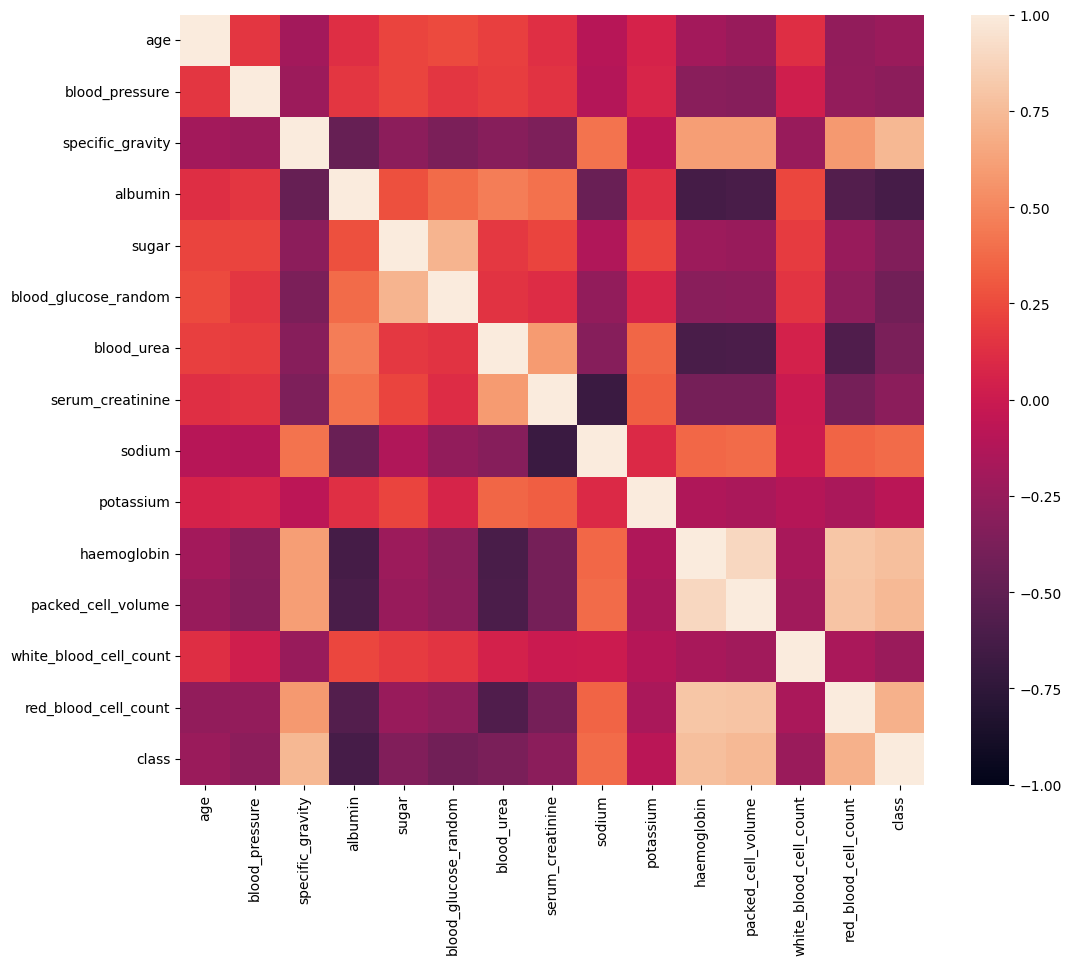

In [ ]:

numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation on the numerical data
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1)
plt.show()

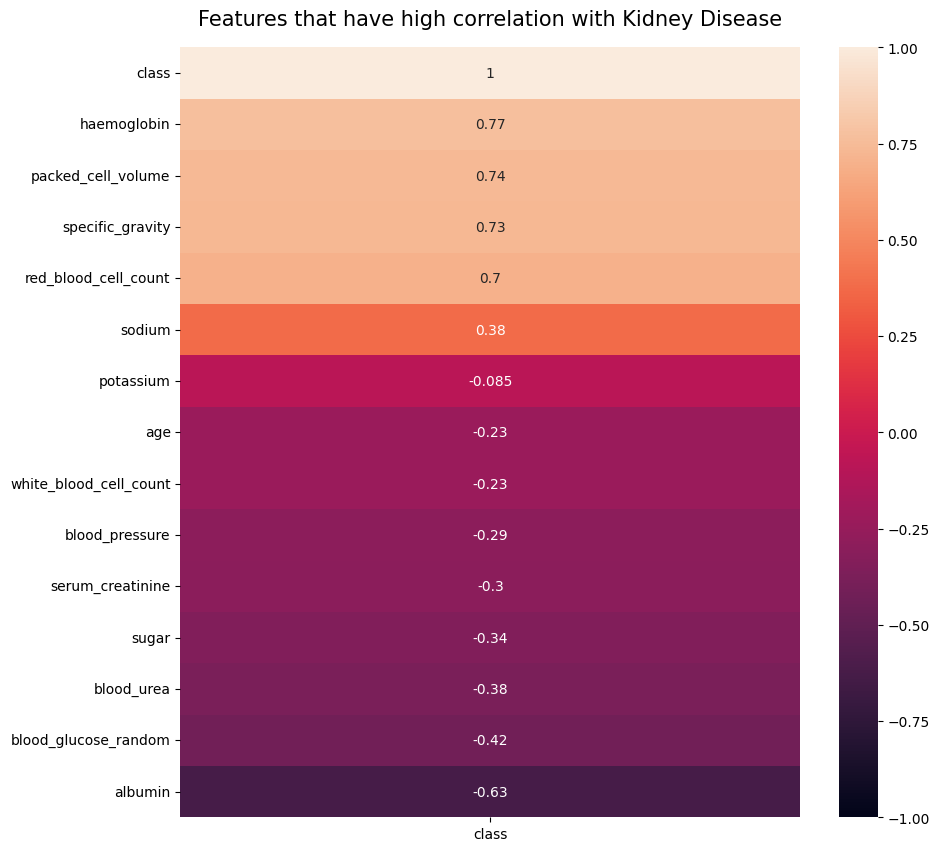

In [ ]:

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(numerical_df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Features that have high correlation with Kidney Disease', fontdict={'fontsize':15}, pad=16);

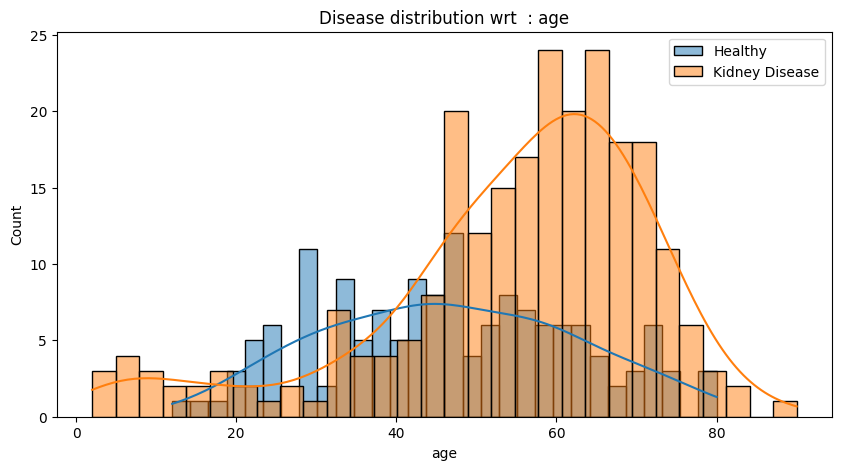

In [ ]:
feature = 'age'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['class'] == 1][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['class'] == 0][feature], bins=30, kde=True, label='Kidney Disease')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

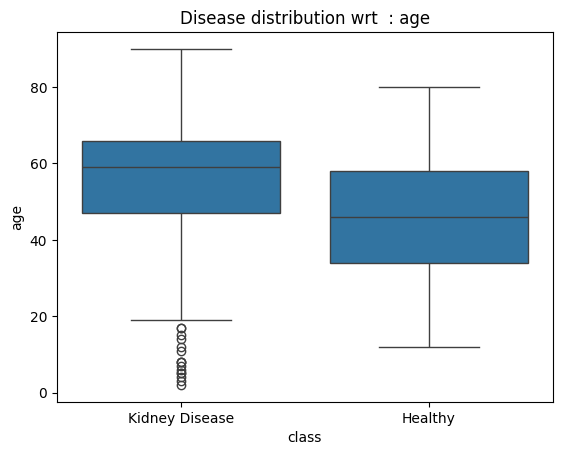

In [ ]:
sns.boxplot(x='class', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Kidney Disease', 'Healthy'])
plt.show()

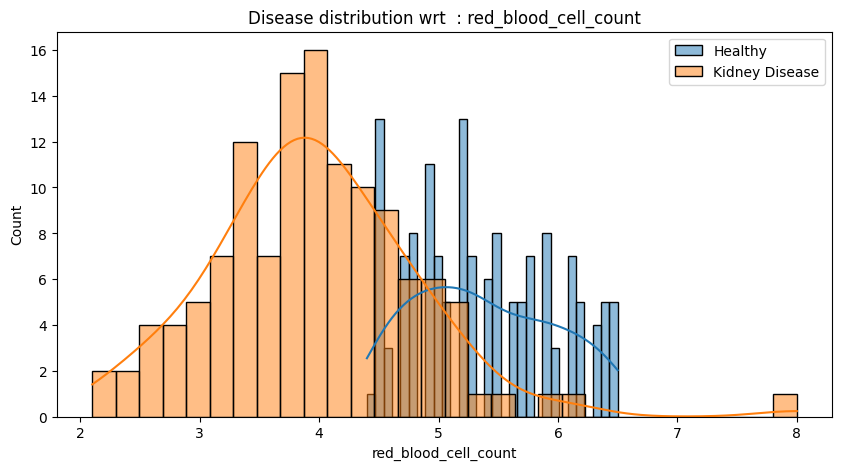

In [ ]:
feature = 'red_blood_cell_count'
plt.figure(figsize=(10,5))

fig = sns.histplot(df[df['class'] == 1][feature], bins=30, kde=True, label='Healthy')
fig = sns.histplot(df[df['class'] == 0][feature], bins=30, kde=True, label='Kidney Disease')
plt.legend()
plt.title("Disease distribution wrt  : "+ feature)
plt.show()

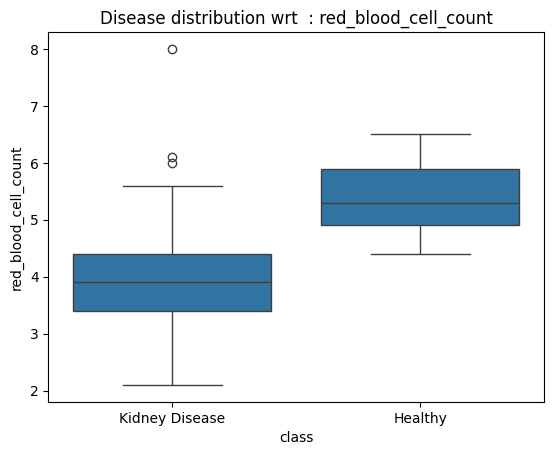

In [ ]:
sns.boxplot(x='class', y=feature, data=df)
plt.title("Disease distribution wrt  : "+ feature)
plt.xticks([0, 1], ['Kidney Disease', 'Healthy'])
plt.show()

In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [ ]:
df[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [ ]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)


In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
blood_glucose_random,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,134.0,...,38.0,6000.0,4.3,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

# print df 1 row with column names tranposed
print(X.head().transpose())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


kidney_scalar = deepcopy(scaler)
kidney_feature_names = X_train.columns

                               0        1        2         3        4
age                        48.00     7.00    62.00    48.000    51.00
blood_pressure             80.00    50.00    80.00    70.000    80.00
specific_gravity            1.02     1.02     1.01     1.005     1.01
albumin                     1.00     4.00     2.00     4.000     2.00
sugar                       0.00     0.00     3.00     0.000     0.00
red_blood_cells             1.00     1.00     1.00     1.000     1.00
pus_cell                    1.00     1.00     1.00     0.000     1.00
pus_cell_clumps             0.00     0.00     0.00     1.000     0.00
bacteria                    0.00     0.00     0.00     0.000     0.00
blood_glucose_random      121.00   134.00   423.00   117.000   106.00
blood_urea                 36.00    18.00    53.00    56.000    26.00
serum_creatinine            1.20     0.80     1.80     3.800     1.40
sodium                    135.00   134.00   135.00   111.000   138.00
potassium           

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained model using various metrics.

    Args:
        model: The trained machine learning model.
        X_test: The test features.
        y_test: The true labels for the test set.

    Returns:
        A dictionary containing the computed metrics.
    """

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    _confusion_matrix = confusion_matrix(y_test, y_pred)
    _classification_report = classification_report(y_test, y_pred)

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": _confusion_matrix,
        "Classification Report": _classification_report
    }

    return metrics




###############################################################################
# 1) Search spaces
###############################################################################
param_grids = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": [0.01, 0.1, 1, 10],
        "solver": ["saga"],              # supports all penalties + probas
        "l1_ratio": [0, 0.5, 1]          # used only when penalty="elasticnet"
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 11, 15],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Random Forest": {
        "n_estimators": [200, 400, 800],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "bootstrap": [True, False]
    },
    "XGBoost": {
        "n_estimators":  np.arange(300, 801, 100),
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth":     [3, 5, 7],
        "subsample":     [0.8, 1],
        "colsample_bytree": [0.8, 1],
        "gamma":         [0, 0.5, 1]
    }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric="logloss",
        random_state=42, n_jobs=-1, scale_pos_weight=1  # tweak if data is imbalanced
    ),
}

###############################################################################
# 2) Helper – choose GridSearch vs RandomizedSearch
###############################################################################
def tuned_estimator(name, base_model, X, y, cv=5):
    scorer = make_scorer(roc_auc_score, needs_proba=True)
    if name == "XGBoost":  # large search space → RandomizedSearch
        search = RandomizedSearchCV(
            base_model,
            param_distributions=param_grids[name],
            n_iter=40,
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            random_state=42,
            verbose=0,
        )
    else:                  # modest spaces → full GridSearch
        search = GridSearchCV(
            base_model,
            param_grid=param_grids[name],
            scoring=scorer,
            cv=cv,
            n_jobs=-1,
            verbose=0,
        )
    search.fit(X, y)
    print(f"{name}: best CV ROC‑AUC = {search.best_score_:.4f}")
    print(f"   best params   = {search.best_params_}\n")
    return search.best_estimator_



# ---------------------------------------------------------------------------
# 3) Tune, train on full train set, evaluate on hold‑out test set, and save
# ---------------------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_auc = -np.inf          # NEW
best_model = None           # NEW
best_name  = ""             # NEW
all_results = []            # save every model's metrics if you wish

for name, base_model in models.items():
    print(f"⏳  Tuning {name} …")
    tuned_model = tuned_estimator(name, base_model, X_train_scaled, y_train, cv=cv)

    metrics = evaluate_model(tuned_model, X_test_scaled, y_test)
    all_results.append((name, metrics, tuned_model))          # NEW

    test_auc = metrics["ROC-AUC"]
    print(f"▶️  Test‑set performance for {name} (ROC‑AUC = {test_auc:.4f})")
    for m, v in metrics.items():
        if m in ["Confusion Matrix", "Classification Report"]:
            print(f"{m}:\n{v}")
        else:
            print(f"{m}: {v:.4f}")
    print("-" * 60)

    # --- keep track of the best model -------------------------------------- #
    if test_auc > best_auc:
        best_auc   = test_auc
        best_model = tuned_model
        best_name  = name

# ---------------------------------------------------------------------------
# 4) Persist the best model to disk (pickle)
# ---------------------------------------------------------------------------
out_path = Path("best_model_kidney.pkl")
with out_path.open("wb") as f:
    pickle.dump(best_model, f)

print(f"✅  Saved best model ({best_name}, ROC‑AUC = {best_auc:.4f}) ➜ {out_path.resolve()}")


⏳  Tuning Logistic Regression …
Logistic Regression: best CV ROC‑AUC = nan
   best params   = {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}

▶️  Test‑set performance for Logistic Regression (ROC‑AUC = 0.5000)
Accuracy: 0.6250
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5000
Confusion Matrix:
[[50  0]
 [30  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        50
           1       0.00      0.00      0.00        30

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80

------------------------------------------------------------
⏳  Tuning K-Nearest Neighbors …
K-Nearest Neighbors: best CV ROC‑AUC = nan
   best params   = {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

▶️  Test‑set performance for K-Nearest Neighbors (ROC‑AUC = 0.9880)
Accuracy: 0.9500


In [ ]:
import joblib, json, os
from pathlib import Path

# Paths to the models you pickled earlier
model_paths = {
    "Parkinson's": "best_model_parkinsons.pkl",
    "Liver":       "best_model_liver.pkl",
    "Kidney":      "best_model_kidney.pkl"
}

# Scalers and feature names you kept in RAM
scalers = {
    "Parkinson's": parkinson_scalar,
    "Liver":       liver_scalar,
    "Kidney":      kidney_scalar
}
feature_lists = {
    "Parkinson's": list(parkinson_feature_names),
    "Liver":       list(liver_feature_names),
    "Kidney":      list(kidney_feature_names)
}


# --- load models and pack everything --------------------------------------
bundle = {}
for disease, pkl in model_paths.items():
    bundle[disease] = {
        "model":   joblib.load(pkl),
        "scaler":  scalers[disease],
        "features": feature_lists[disease]
    }

joblib.dump(bundle, "disease_models.pkl")
print("✅  All set — bundled models saved to disease_models.pkl")

✅  All set — bundled models saved to disease_models.pkl


In [ ]:
!pip install -q streamlit
!npm install -q localtunnel

⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 969ms
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠇

In [ ]:
%%writefile multidisease_app.py
import streamlit as st, joblib, numpy as np

# ---------- helper: convert free‑text to float / 0‑1 boolean ----------
def _to_num(txt: str) -> float:
    txt = txt.strip()
    if txt.lower() in {"true", "yes"}:  return 1.0
    if txt.lower() in {"false", "no"}:  return 0.0
    try:   return float(txt)
    except ValueError: return 0.0

# ---------- load bundled models / scalers / feature lists ----------
@st.cache_resource(show_spinner=False)
def _load(path="disease_models.pkl"):
    return joblib.load(path)

BUNDLE   = _load()
DISEASES = list(BUNDLE.keys())

# ---------- hard‑coded example rows (first row from each sample) ----------
EXAMPLES = {
    "Parkinson's": {
        "MDVP:Fo(Hz)":119.992,"MDVP:Fhi(Hz)":157.302,"MDVP:Flo(Hz)":74.997,
        "MDVP:Jitter(%)":0.00784,"MDVP:Jitter(Abs)":0.00007,"MDVP:RAP":0.0037,
        "MDVP:PPQ":0.00554,"Jitter:DDP":0.01109,"MDVP:Shimmer":0.04374,
        "MDVP:Shimmer(dB)":0.426,"Shimmer:APQ3":0.02182,"Shimmer:APQ5":0.0313,
        "MDVP:APQ":0.02971,"Shimmer:DDA":0.06545,"NHR":0.02211,"HNR":21.033,
        "RPDE":0.414783,"DFA":0.815285,"spread1":-4.813031,"spread2":0.266482,
        "D2":2.301442,"PPE":0.284654
    },
    "Liver": {
        "Age":65,"Total_Bilirubin":0.7,"Alkaline_Phosphotase":187,
        "Alamine_Aminotransferase":16,"Total_Protiens":6.8,
        "Albumin_and_Globulin_Ratio":0.9,"Gender_Female":1,"Gender_Male":0
    },
    "Kidney": {
        "age":48,"blood_pressure":80,"specific_gravity":1.02,"albumin":1,
        "sugar":0,"red_blood_cells":1,"pus_cell":1,"pus_cell_clumps":0,
        "bacteria":0,"blood_glucose_random":121,"blood_urea":36,
        "serum_creatinine":1.2,"sodium":135,"potassium":4.9,"haemoglobin":15.4,
        "packed_cell_volume":44,"white_blood_cell_count":7800,
        "red_blood_cell_count":5.2,"hypertension":1,"diabetes_mellitus":1,
        "coronary_artery_disease":0,"appetite":0,"peda_edema":0,"aanemia":0
    }
}

# ---------- sidebar selection ----------
st.sidebar.title("🩺 Multi‑Disease Predictor")
choice = st.sidebar.radio("Select a disease model:", DISEASES)

info      = BUNDLE[choice]
features  = info["features"]
model     = info["model"]
scaler    = info["scaler"]
examples  = EXAMPLES.get(choice, {})

st.title(f"{choice} Prediction")
st.write("Enter clinical measurements (edit any sample value):")

# ---------- input form ----------
with st.form("input_form"):
    cols = st.columns(2)
    user_vals = {}
    for i, feat in enumerate(features):
        with cols[i % 2]:
            hint = str(examples.get(feat, ""))
            user_vals[feat] = st.text_input(feat, value=hint, placeholder="Type a number")
    submitted = st.form_submit_button("Predict")

# ---------- prediction ----------
if submitted:
    X = np.array([_to_num(user_vals[f]) for f in features]).reshape(1, -1)
    X_scaled = scaler.transform(X)
    prob = float(model.predict_proba(X_scaled)[0, 1])
    pred = int(model.predict(X_scaled)[0])

    st.subheader("🔍 Result")
    st.write(f"**Probability of disease:** {prob:.1%}")
    st.write("⚠️ Disease detected.")  if pred == 1 else st.write("✅ No disease detected.")

Overwriting multidisease_app.py


In [ ]:
!streamlit run multidisease_app.py &>logs.txt & npx localtunnel --port 8501

⠙your url is: https://soft-bags-sniff.loca.lt
^C
